<a href="https://colab.research.google.com/github/jagadeesan121/jagadeesan/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [7]:
df.shape
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

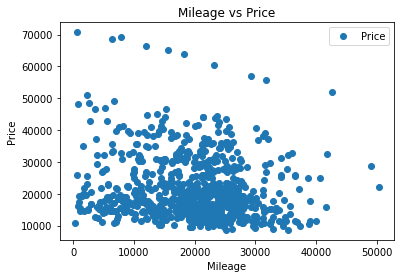

In [11]:
df.plot(x='Mileage',y='Price',style='o')
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show


In [20]:
x=df.loc[:,['Mileage']].values
y=df.loc[:,['Price']].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,Y_test= train_test_split(x,y, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [23]:
print('r-squared: ', reg.score(x, y))

r-squared:  0.020401359140504116


In [ ]:
#task 2

<function matplotlib.pyplot.show(*args, **kw)>

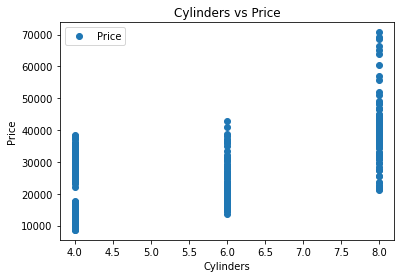

In [29]:
df.plot(x='Cylinder',y='Price',style='o')
plt.title("Cylinders vs Price")
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.show


In [37]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

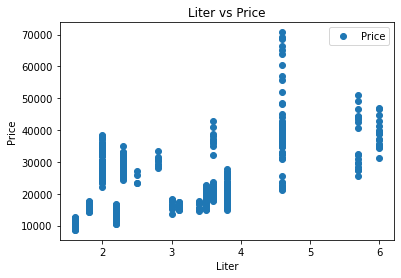

In [31]:
df.plot(x='Liter',y='Price',style='o')
plt.title("Liter vs Price")
plt.xlabel("Liter")
plt.ylabel("Price")
plt.show


In [38]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

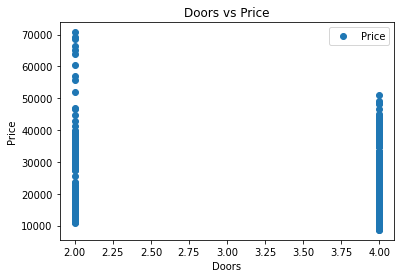

In [32]:
df.plot(x='Doors',y='Price',style='o')
plt.title("Doors vs Price")
plt.xlabel("Doors")
plt.ylabel("Price")
plt.show


In [39]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


<function matplotlib.pyplot.show(*args, **kw)>

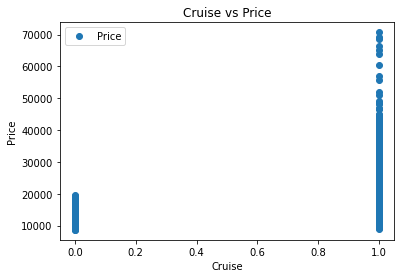

In [33]:
df.plot(x='Cruise',y='Price',style='o')
plt.title("Cruise vs Price")
plt.xlabel("Cruise")
plt.ylabel("Price")
plt.show


In [40]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

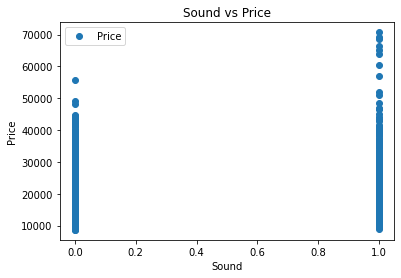

In [34]:
df.plot(x='Sound',y='Price',style='o')
plt.title("Sound vs Price")
plt.xlabel("Sound")
plt.ylabel("Price")
plt.show


In [41]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

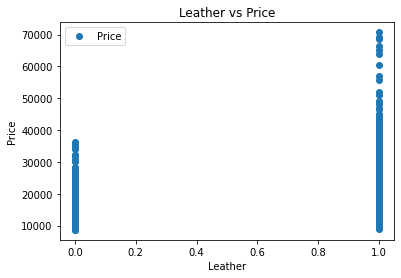

In [35]:
df.plot(x='Leather',y='Price',style='o')
plt.title("Leather vs Price")
plt.xlabel("Leather")
plt.ylabel("Price")
plt.show


In [42]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [43]:
x=df.loc[:,['Cylinder']].values
y=df.loc[:,['Price']].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,Y_test= train_test_split(x,y, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
print('r-squared: ', reg.score(x, y))

r-squared:  0.32229011429275733


In [ ]:
#task 3

In [46]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [47]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']

regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [48]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477
